## Upload Data

In [1]:
!wget -O dontpatronizeme_pcl.tsv https://raw.githubusercontent.com/CRLala/NLPLabs-2024/main/Dont_Patronize_Me_Trainingset/dontpatronizeme_pcl.tsv

--2024-02-12 17:27:07--  https://raw.githubusercontent.com/CRLala/NLPLabs-2024/main/Dont_Patronize_Me_Trainingset/dontpatronizeme_pcl.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3122842 (3.0M) [text/plain]
Saving to: ‘dontpatronizeme_pcl.tsv’

dontpatronizeme_pcl 100%[===================>]   2.98M  --.-KB/s    in 0.07s   

2024-02-12 17:27:07 (43.1 MB/s) - ‘dontpatronizeme_pcl.tsv’ saved [3122842/3122842]



In [2]:
!wget -O dontpatronizeme_categories.tsv https://raw.githubusercontent.com/CRLala/NLPLabs-2024/main/Dont_Patronize_Me_Trainingset/dontpatronizeme_categories.tsv

--2024-02-12 17:27:07--  https://raw.githubusercontent.com/CRLala/NLPLabs-2024/main/Dont_Patronize_Me_Trainingset/dontpatronizeme_categories.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1342370 (1.3M) [text/plain]
Saving to: ‘dontpatronizeme_categories.tsv’

dontpatronizeme_cat 100%[===================>]   1.28M  --.-KB/s    in 0.06s   

2024-02-12 17:27:08 (21.1 MB/s) - ‘dontpatronizeme_categories.tsv’ saved [1342370/1342370]



In [3]:
!wget -O train_semeval_parids-labels.csv https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/practice%20splits/train_semeval_parids-labels.csv

--2024-02-12 17:27:25--  https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/practice%20splits/train_semeval_parids-labels.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241839 (236K) [text/plain]
Saving to: ‘train_semeval_parids-labels.csv’

train_semeval_parid 100%[===================>] 236.17K  --.-KB/s    in 0.03s   

2024-02-12 17:27:25 (6.64 MB/s) - ‘train_semeval_parids-labels.csv’ saved [241839/241839]



In [4]:
!wget -O dev_semeval_parids-labels.csv https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/practice%20splits/dev_semeval_parids-labels.csv

--2024-02-12 17:27:26--  https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/practice%20splits/dev_semeval_parids-labels.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61151 (60K) [text/plain]
Saving to: ‘dev_semeval_parids-labels.csv’

dev_semeval_parids- 100%[===================>]  59.72K  --.-KB/s    in 0.01s   

2024-02-12 17:27:26 (5.05 MB/s) - ‘dev_semeval_parids-labels.csv’ saved [61151/61151]



In [40]:
from urllib import request
import pandas as pd
import logging
import torch
from collections import Counter
from ast import literal_eval
import matplotlib.pyplot as plt

In [6]:
# prepare logger
logging.basicConfig(level=logging.INFO)

transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# check gpu
cuda_available = torch.cuda.is_available()

print('Cuda available? ',cuda_available)

Cuda available?  True


In [7]:
if cuda_available:
  import tensorflow as tf
  # Get the GPU device name.
  device_name = tf.test.gpu_device_name()
  # The device name should look like the following:
  if device_name == '/device:GPU:0':
      print('Found GPU at: {}'.format(device_name))
  else:
      raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [8]:
module_url = f"https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
#with open("file_1.txt") as f1, open("file_2.txt") as f2
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

Fetching https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py


In [9]:
# helper function to save predictions to an output file
def labels2file(p, outf_path):
	with open(outf_path,'w') as outf:
		for pi in p:
			outf.write(','.join([str(k) for k in pi])+'\n')

In [10]:
from dont_patronize_me import DontPatronizeMe

In [11]:
dpm = DontPatronizeMe('.', '.')

In [12]:
dpm.load_task1()
dpm.load_task2(return_one_hot=True)

Map of label to numerical label:
{'Unbalanced_power_relations': 0, 'Shallow_solution': 1, 'Presupposition': 2, 'Authority_voice': 3, 'Metaphors': 4, 'Compassion': 5, 'The_poorer_the_merrier': 6}


In [13]:
data=dpm.train_task1_df

In [20]:
data.head(5)

,par_id,art_id,keyword,country,text,label,orig_label
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0,0
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0,0
2,3,@@16584954,immigrant,ie,"""White House press secretary Sean Spicer said ...",0,0
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0,0
4,5,@@1494111,refugee,ca,""""""" Just like we received migrants fleeing El ...",0,0


## Task 1b: Qualitative assessment of the dataset, considering either how hard or how subjective the task is

#### (1) Examine the characteristics of paragraphs/keywords that fall into the borderline categories (1 and 3) versus those that are clearly labeled as no PCL (0) or definite PCL (2 and 4)

In [25]:
data_pcl = data[data['label'] == 1]

In [34]:
data_pcl[(data_pcl['orig_label'] == '2')].head(5)

,par_id,art_id,keyword,country,text,label,orig_label
32,33,@@8301323,disabled,pk,Arshad said that besides learning many new asp...,1,2
148,149,@@1387882,disabled,us,Krueger recently harnessed that creativity to ...,1,2
170,171,@@18450304,women,bd,""""""" I am very excited to see the monetary resu...",1,2
178,179,@@15574765,women,ca,"Jenny Neal , regional director of the Grandmot...",1,2
237,238,@@21800857,hopeless,bd,""""""" This system appears designed to make Rohin...",1,2


In [35]:
data_pcl[(data_pcl['orig_label'] == '4')].head(5)

,par_id,art_id,keyword,country,text,label,orig_label
117,118,@@24885862,in-need,za,"""This is the rhetoric of what anthropologist L...",1,4
153,154,@@20663936,disabled,ng,When some people feel causing problem for some...,1,4
156,157,@@21712008,poor-families,ca,We are alarmed to learn of your recently circu...,1,4
186,187,@@24814760,in-need,bd,""""""" We share a global responsibility to respon...",1,4
194,195,@@4478900,homeless,gb,Housing Minister Grant Shapps added : ' The pl...,1,4


**Discussions**

There are certain keywords might lead to a perception of patronizing language, even if that wasn't the intent or the full context might suggest otherwise. For example, for the keyword "disabled", if the text is objectively reporting on policies or facilities to improve the lives of disabled individuals, using the term "disabled" is factual. However, if the surrounding language is overly sympathetic or implies that disabled people are unable to lead fulfilling lives without assistance, it could be labeled as patronizing due to the subjective interpretation of the annotators. Also, for the keyword "homeless", the term "homeless" can be used in a policy context to describe a demographic in need of housing solutions. But if the text veers into a tone that suggests homelessness is a condition that renders people helpless or devoid of agency, it might be labeled as patronizing. Without full context, annotators might err on the side of caution and label any text with this keyword as such.

#### (2) Evaluate whether the keywords used to identify vulnerable communities are consistently associated with PCL

In [ ]:
# Filter the DataFrame to get all rows with label 1.
label_1_data = data[data['label'] == 1]

# Filter the DataFrame to get all rows with label 0.
label_0_data = data[data['label'] == 0]

# Get the unique keywords for label 1.
keywords_label_1 = set(label_1_data['keyword'].unique())

# Get the unique keywords for label 0.
keywords_label_0 = set(label_0_data['keyword'].unique())

# Find the intersection of the two sets to get common keywords.
common_keywords = keywords_label_1.intersection(keywords_label_0)

# Print the common keywords.
print(common_keywords)

{'disabled', 'vulnerable', 'immigrant', 'homeless', 'refugee', 'in-need', 'women', 'poor-families', 'hopeless', 'migrant'}


**Discussion**

The common keywords found — such as 'disabled', 'vulnerable', 'immigrant', 'homeless', 'refugee', 'in-need', 'women', 'poor-families', 'hopeless', and 'migrant' — are potentially sensitive terms that can be used in a variety of contexts. However, the fact that they appear in both labeled '1' and '0' categories indicates their use is not consistently associated with PCL. This could mean that the presence of these keywords requires careful consideration of the surrounding text to determine if the language is actually patronizing.

#### (3) Cultural Sensitivity: cultural or regional differences in language that affect PCL perception

In [ ]:
# Filter the DataFrame for label 1 and label 0.
label_1_data = data[data['label'] == 1]
label_0_data = data[data['label'] == 0]

# Group by 'keyword' and 'country' and count occurrences.
keyword_country_label_1 = label_1_data.groupby(['keyword', 'country']).size().reset_index(name='count_label_1')
keyword_country_label_0 = label_0_data.groupby(['keyword', 'country']).size().reset_index(name='count_label_0')

# Merge the two dataframes on 'keyword' to compare.
merged_data = pd.merge(keyword_country_label_1, keyword_country_label_0, on='keyword', suffixes=('_1', '_0'))

# Find keywords that have label 1 in one country and label 0 in another country.
# This is done by checking if the 'country' columns are different.
result = merged_data[merged_data['country_1'] != merged_data['country_0']]

print(result[['keyword', 'country_1', 'country_0']])

       keyword country_1 country_0
1     disabled        au        bd
2     disabled        au        ca
3     disabled        au        gb
4     disabled        au        gh
5     disabled        au        hk
...        ...       ...       ...
3754     women        za        ph
3755     women        za        pk
3756     women        za        sg
3757     women        za        tz
3758     women        za        us

[3572 rows x 3 columns]


**Discussion**

This analysis can reveal some insights into the cultural and regional differences in how language is perceived. For example, the keyword "disabled" may be associated with PCL in Australia (au) but not in Bangladesh (bd). This could be due to different cultural norms, sensitivities, or even media portrayal norms in these countries.

## Task 2c: Further Model Improvements — Data Sampling

#### (1) Reweighting

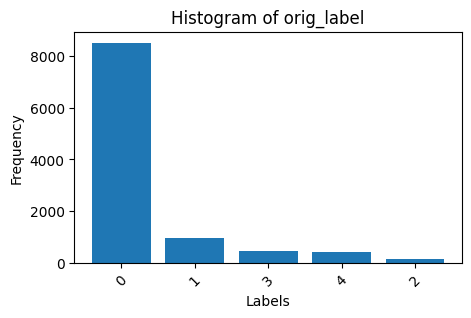

In [45]:
# Assuming 'data' is your DataFrame and 'orig_label' is the column of interest
value_counts = data['orig_label'].value_counts()

# Plotting the histogram
plt.figure(figsize=(5, 3))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Histogram of orig_label')
plt.xticks(rotation=45)
plt.show()

In [46]:
# Calculate the class frequencies
class_counts = data['label'].value_counts()

# Calculate the weight for each class as the inverse of the class frequency
weights = data['label'].map(lambda x: 1.0 / class_counts[x])

# Normalize the weights to make the sum equal to the number of instances
weights *= len(data) / weights.sum()

# Add the instance weights to the DataFrame
data['instance_weights'] = weights

In [47]:
data['instance_weights']

0        0.552396
1        0.552396
2        0.552396
3        0.552396
4        0.552396
           ...   
10464    0.552396
10465    0.552396
10466    5.271400
10467    5.271400
10468    5.271400
Name: instance_weights, Length: 10469, dtype: float64

(2) Downsampling

In [ ]:
from sklearn.utils import resample

# Check label imbalance
df = data.copy()
label_counts = df['label'].value_counts()
print("Label Distribution on Original Dataset:")
print(label_counts)

# Determine the majority and minority classes
majority_class = label_counts.idxmax()
minority_class = label_counts.idxmin()

# Separate the majority and minority classes
df_majority = df[df['label'] == majority_class]
df_minority = df[df['label'] == minority_class]

# Up-sample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=label_counts[majority_class],    # to match majority class
                                 random_state=123) # reproducible results

# Down-sample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # sample without replacement
                                   n_samples=label_counts[minority_class], # to match minority class
                                   random_state=123) # reproducible results

# Combine the balanced datasets
# For up-sampling
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# For down-sampling
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Check new class counts to verify balancing
print(df_upsampled['label'].value_counts())
print(df_downsampled['label'].value_counts())

Label Distribution on Original Dataset:
0    9476
1     993
Name: label, dtype: int64
0    9476
1    9476
Name: label, dtype: int64
0    993
1    993
Name: label, dtype: int64


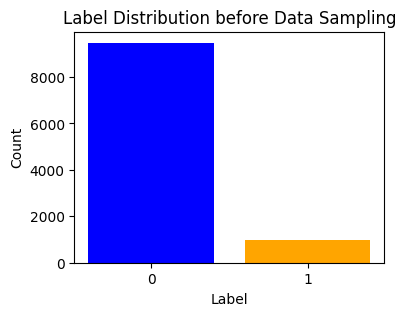

In [ ]:
# Plotting the label distribution as a bar chart
import matplotlib.pyplot as plt
labels = label_counts.index
counts = label_counts.values

plt.figure(figsize=(4, 3))
plt.bar(labels, counts, color=['blue', 'orange']) # Corrected line
plt.title('Label Distribution before Data Sampling')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(labels)
plt.show()

#### (2) Upsampling

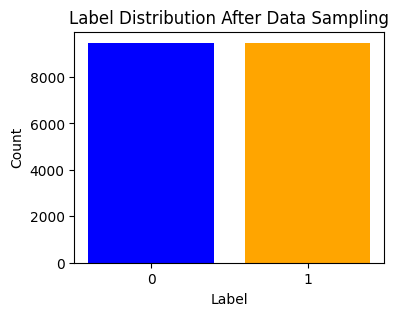

In [ ]:
upsampled_counts = df_upsampled['label'].value_counts()
labels = upsampled_counts.index
counts = upsampled_counts.values

plt.figure(figsize=(4, 3))
plt.bar(labels, counts, color=['blue', 'orange']) # Corrected line
plt.title('Label Distribution After Data Sampling')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(labels)
plt.show()